In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.metrics import silhouette_score # Método Silhouette
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer # Método Elbow para conseguir o valor ideal de clusters

import os

### Definindo o nosso dataset

In [48]:
data_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)
data_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [49]:
data_set.describe(include = "all")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Normalizando e transformando os dados

In [50]:
# Retira o label
data_set = data_set.drop(columns=[0])

# Normalizando com o MinMaxScaler
scaler = MinMaxScaler()
normalized_dataset = scaler.fit_transform(data_set)

# Reduzindo a dimensionalidade 
pca = PCA(n_components=6)
dataset_pca = pca.fit_transform(normalized_dataset)
transformed_dataset = pd.DataFrame(dataset_pca)

### Método Elbow e Silhouette aplicado ao dataset

 O método Elbow consiste em plotar a soma dos quadrados intra-cluster (abreviado para wcss em inglês), e escolher o número de clusters no ponto de "cotovelo" da curva, que é o ponto que indica o equilíbrio entre maior homogeneidade dentro do cluster e a maior diferença entre clusters.
Já o índice de Silhouette é uma medida de avaliação que também ajuda a determinar uma quantidade ideal de clusters em um conjunto de dados, assim como o Elbow. O valor dele varia de -1 a 1, e um valor mais próximo de 1 indica que a clusterização está bem definida, enquanto que um valor baixo indica que os pontos estão muito próximos uns dos outros ou muito próximos de pontos que estão em outros clusters. O cálculo do valor do Silhouette leva em consideração a distância média dos pontos dentro de um cluster e a distância média dos pontos para os clusters vizinhos mais próximos. O valor do Silhouette é calculado para cada ponto de dados e, em seguida, é calculada a média desses valores para todos os pontos.


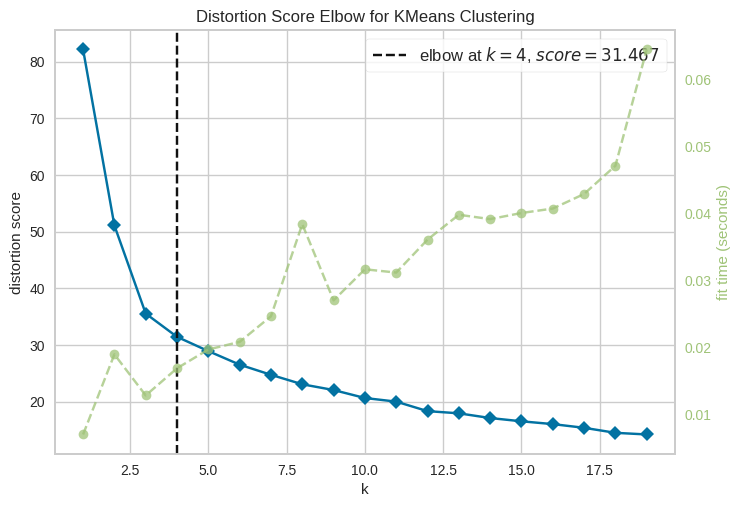

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
model = KMeans(n_init = 10)
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(transformed_dataset)
visualizer.poof()

Apesar de o retorno ser 4 como o número ideal de clusters, é possível perceber, pelo gráfico acima, que não há um ponto claramente definido como o número ideal.
Logo, iremos calcular o Silhouette Score com outros valores de "k", e a maior média do Silhouette será o KMeans com a quantidade ideal de clusters. 


In [59]:
other_k = [2, 3, 4, 5, 6]

for i in other_k:
  kmeans = KMeans(n_clusters=i, n_init = 10).fit(transformed_dataset)
  print(f'Silhouette Score for K = {i}: {metrics.silhouette_score(transformed_dataset , kmeans.labels_)}')

Silhouette Score for K = 2: 0.34823132125612544
Silhouette Score for K = 3: 0.3611117729879813
Silhouette Score for K = 4: 0.3025601281595272
Silhouette Score for K = 5: 0.30297726816289416
Silhouette Score for K = 6: 0.2626032437765277


O valor da silhouette para K = 3 é maior, então iremos utilizar ele

### Resultados da clusterização do KMeans:

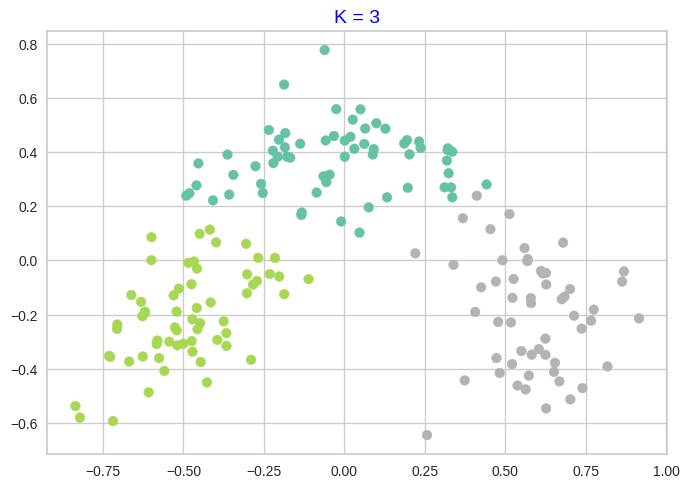

In [60]:
import matplotlib.colors
kmeans = KMeans(n_clusters=3, n_init = 10).fit(transformed_dataset)
centers = kmeans.cluster_centers_

fig, ax  = plt.subplots()
ax.scatter(transformed_dataset[0], transformed_dataset[1], c=kmeans.labels_, cmap='Set2')
ax.set_title("K = 3", fontsize=14, color="blue")
plt.show()


Também podemos utilizar outros valores de K como parâmetro, para efeito de comparação

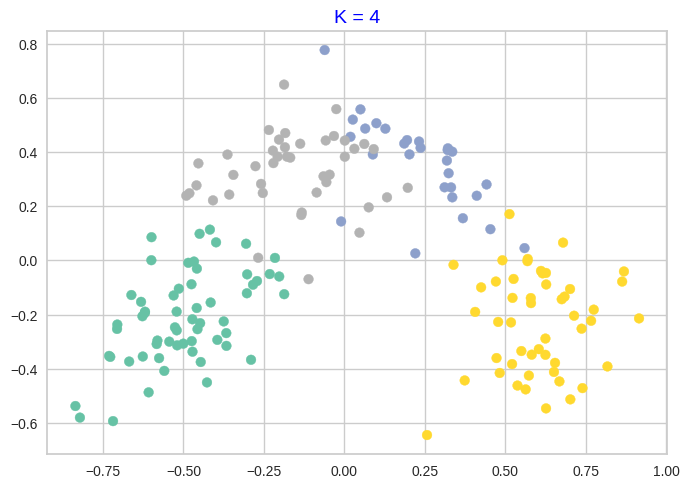

In [61]:
kmeans = KMeans(n_clusters=4, n_init = 10).fit(transformed_dataset)
centers = kmeans.cluster_centers_

fig, ax  = plt.subplots()

ax.scatter(transformed_dataset[0], transformed_dataset[1], c=kmeans.labels_, cmap='Set2')
ax.set_title("K = 4", fontsize=14, color="blue")
plt.show()

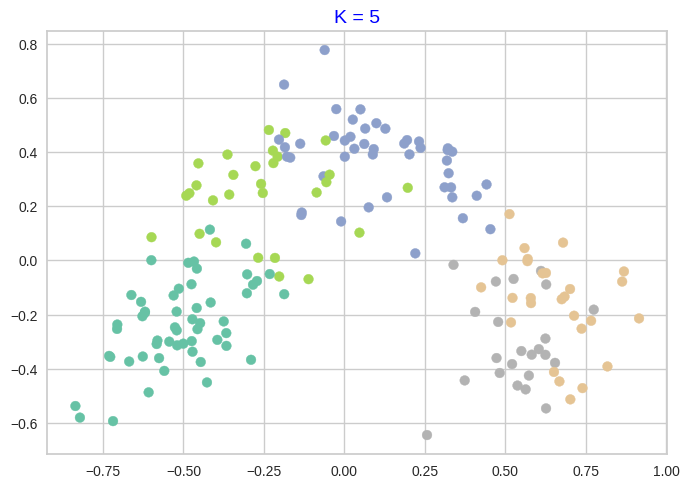

In [62]:
kmeans = KMeans(n_clusters=5, n_init = 10).fit(transformed_dataset)
centers = kmeans.cluster_centers_

fig, ax  = plt.subplots()
ax.scatter(transformed_dataset[0], transformed_dataset[1], c=kmeans.labels_, cmap='Set2')
ax.set_title("K = 5", fontsize=14, color="blue")
plt.show()

Também podemos plotar o gráfico sem a transformação do dataset utilizado:

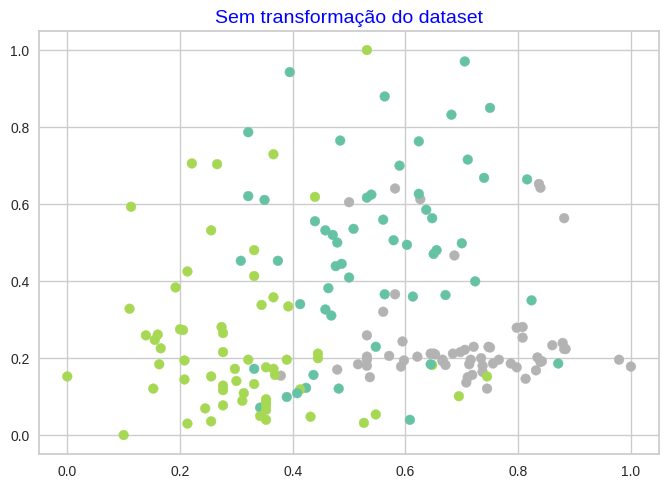

In [63]:
kmeans = KMeans(n_clusters=3, n_init = 10).fit(normalized_dataset)
centers = kmeans.cluster_centers_

fig, ax  = plt.subplots()
ax.scatter(normalized_dataset[:, 0], normalized_dataset[:, 1], c=kmeans.labels_, cmap='Set2')
ax.set_title("Sem transformação do dataset", fontsize=14, color="blue")
plt.show()

É possível reduzir ainda mais a dimensão do dataset.
Nesse caso, podemos observar que isso resultará em um aumento no valor do silhouette, o que indica que a clusterização está melhor definida.

In [64]:
# Reduzindo ainda mais a dimensionalidade
pca_2 = PCA(n_components=2)
dataset_pca_2 = pca_2.fit_transform(normalized_dataset)
transformed_dataset_2 = pd.DataFrame(dataset_pca_2)

other_k = [2, 3, 4, 5, 6]

for i in other_k:
  kmeans = KMeans(n_clusters=i, n_init = 10).fit(transformed_dataset_2)
  print(f'Silhouette Score for K = {i}: {metrics.silhouette_score(transformed_dataset_2 , kmeans.labels_)}')

Silhouette Score for K = 2: 0.49266925641587783
Silhouette Score for K = 3: 0.5680591392935428
Silhouette Score for K = 4: 0.4901590386140555
Silhouette Score for K = 5: 0.45912412496270805
Silhouette Score for K = 6: 0.42579095471088596


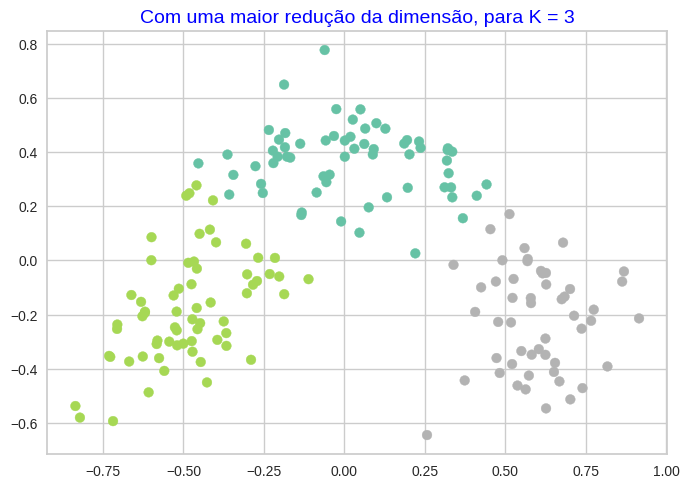

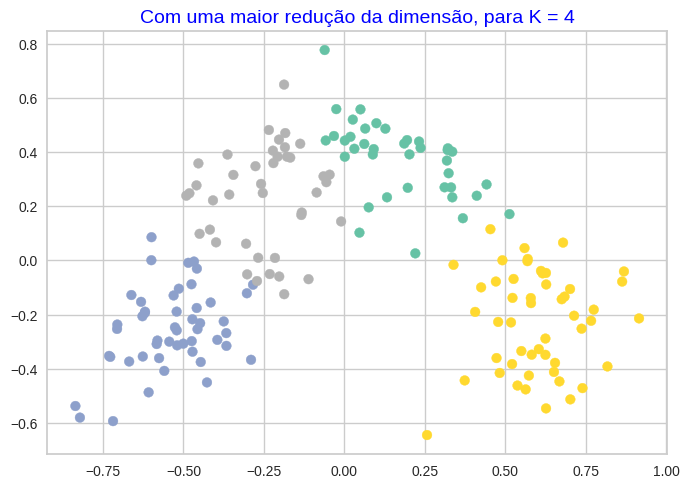

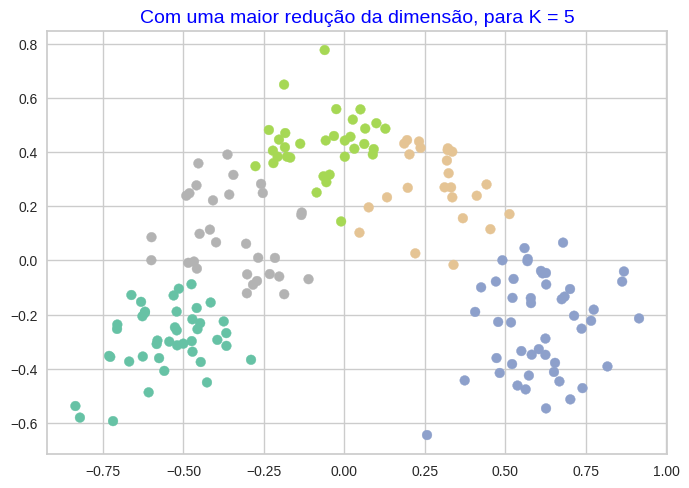

In [65]:
kmeans = KMeans(n_clusters=3, n_init = 10).fit(transformed_dataset_2)
centers = kmeans.cluster_centers_

fig, ax  = plt.subplots()

ax.scatter(transformed_dataset_2.iloc[:, 0], transformed_dataset_2.iloc[:, 1], c=kmeans.labels_, cmap='Set2')
ax.set_title("Com uma maior redução da dimensão, para K = 3", fontsize=14, color="blue")
plt.show()

kmeans = KMeans(n_clusters=4, n_init = 10).fit(transformed_dataset_2)
centers = kmeans.cluster_centers_
fig, ax  = plt.subplots()
ax.scatter(transformed_dataset_2.iloc[:, 0], transformed_dataset_2.iloc[:, 1], c=kmeans.labels_, cmap='Set2')
ax.set_title("Com uma maior redução da dimensão, para K = 4", fontsize=14, color="blue")
plt.show()


kmeans = KMeans(n_clusters=5, n_init = 10).fit(transformed_dataset_2)
centers = kmeans.cluster_centers_
fig, ax  = plt.subplots()
ax.scatter(transformed_dataset_2.iloc[:, 0], transformed_dataset_2.iloc[:, 1], c=kmeans.labels_, cmap='Set2')
ax.set_title("Com uma maior redução da dimensão, para K = 5", fontsize=14, color="blue")
plt.show()

No gráfico acima percebemos que, com uma dimensão menor, a clusterização ficou mais definida, uma vez que menos pontos de cores diferentes estão em um mesmo cluster